# <center> 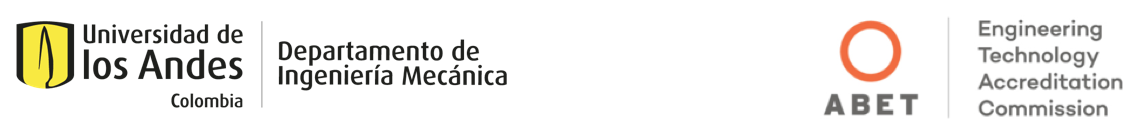
## <span style="color: #147CA6"><center> IMEC 2001-Herramientas Computacionales
## <span style="color: #1AA3D9"><center> Taller 9-ODE

### <span style="color: #147CA6">Fecha Límite de Entrega (Bloque Neón): <font color="#1AA3D9">TODO</font>
___
### <span style="color: #147CA6"> Descripción de la actividad

La actividad tiene como objetivo demostrar su manejo en la descripción de ecuaciones diferenciales ordinarias en Python y su solución numérica.

### <span style="color: #147CA6"> Tener en Cuenta

1. Enviar vía Bloque Neón el archivo en Jupyter Notebook (extensión <font color="#1AA3D9">'.ipynb'</font>).

**Nota:** <font color="#1AA3D9">El nombre del archivo debe ser: `Taller9_NombreApellido1_NombreApellido2.ipynb`.</font>

---

### <span style="color: #1AA3D9"><center> Item 1: Flujo en tuberías

# <center> 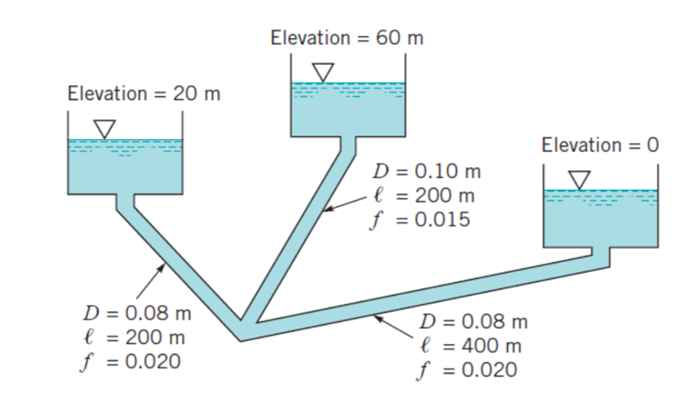 

Utilice el mismo sistema del taller 8, pero esta vez analice el caso en el que cada tanque no es un reservorio infinito. Es decir, en la medida que fluye el agua por un ducto el tanque podría subir (o bajar) de nivel.  Los tanques tienen una geometría cilíndrica con radio de 2 m. Recuerde que para realizar el ODE de la evolución de los niveles de los tanques usted requiere encontrar en cada una de las iteraciones:

<font size="6">$$[\dot{h}_{a},\dot{h}_{b},\dot{h}_{c}]$$ </font>

Siendo cada una, el cambio de las alturas de cada tanque involucrado en el problema. Piense en como el caudal en cada instante ($Q_a,Q_b,Q_c$) se relaciona con $\dot{h}_{a},\dot{h}_{b},\dot{h}_{c}$. Puede verificar si su análisis tiene sentido físicamente si al realizar sus cálculos, las unidades de los cambios de las alturas coinciden con el siguiente análisis dimensional:

$$[\dot{h}]=\frac{[distancia]}{[tiempo]}$$

Puede calcular el caudal como en el taller anterior, pero recuerde que este caudal <span style="color: #1AA3D9"> ahora variará en cada iteración de la solución del ejercicio, es decir, tiene que resolverse múltiples veces<font color="#1AA3D9">.

<span style="color: #1AA3D9">Grafique la evolución del nivel de agua en cada tanque respecto a su elevación inicial en una misma gráfica.

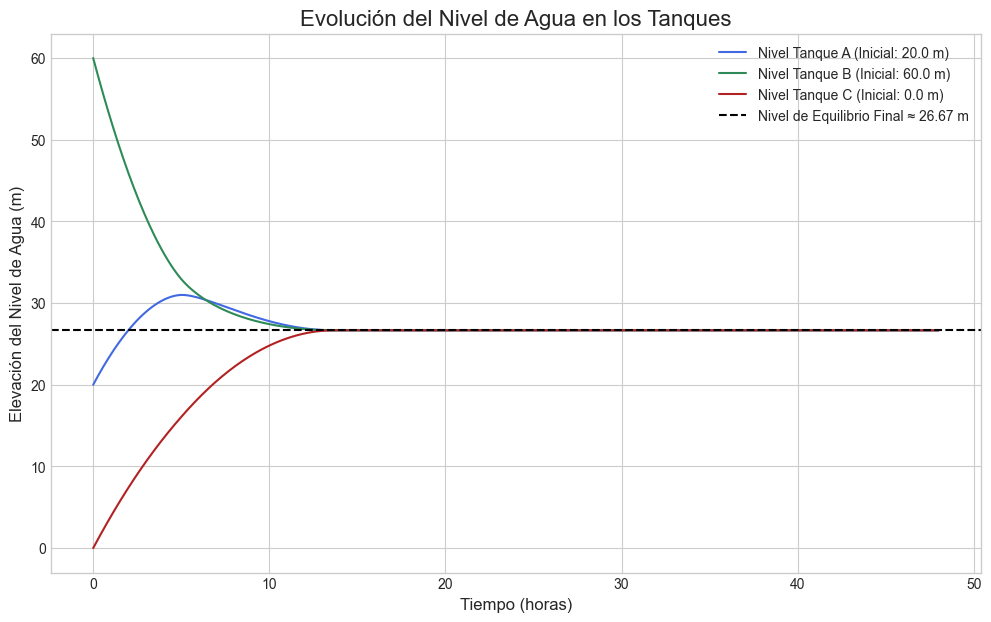

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve


g = 9.81 
R_tanque = 2.0  
A_tanque = np.pi * R_tanque**2 


prop_a = (0.08, 200, 0.020)
prop_b = (0.10, 200, 0.015)
prop_c = (0.08, 400, 0.020)


h_a_inicial = 20.0
h_b_inicial = 60.0
h_c_inicial = 0.0


def calcular_k(D, L, f):
    return (8 * f * L) / (g * np.pi**2 * D**5)

k_a = calcular_k(*prop_a)
k_b = calcular_k(*prop_b)
k_c = calcular_k(*prop_c)



def calcular_caudales(alturas):

    h_a, h_b, h_c = alturas


    def ecuacion_junction(h_j):

        Q_a = np.sign(h_a - h_j) * np.sqrt(abs(h_a - h_j) / k_a)
        Q_b = np.sign(h_b - h_j) * np.sqrt(abs(h_b - h_j) / k_b)
        Q_c = np.sign(h_j - h_c) * np.sqrt(abs(h_j - h_c) / k_c)
        return Q_a + Q_b - Q_c


    h_j_sol = fsolve(ecuacion_junction, h_a)[0]
    
  
    Q_a = np.sign(h_a - h_j_sol) * np.sqrt(abs(h_a - h_j_sol) / k_a)
    Q_b = np.sign(h_b - h_j_sol) * np.sqrt(abs(h_b - h_j_sol) / k_b)
  
    Q_c = Q_a + Q_b
    
    return Q_a, Q_b, Q_c


def modelo_tanques(t, y):

    h_a, h_b, h_c = y
    
  
    Q_a, Q_b, Q_c = calcular_caudales([h_a, h_b, h_c])
    
 
    dh_a_dt = -Q_a / A_tanque
    dh_b_dt = -Q_b / A_tanque
    dh_c_dt = Q_c / A_tanque
    
    return [dh_a_dt, dh_b_dt, dh_c_dt]


y0 = [h_a_inicial, h_b_inicial, h_c_inicial]


t_final = 2 * 24 * 3600
t_span = [0, t_final]


solucion = solve_ivp(modelo_tanques, t_span, y0, dense_output=True, max_step=1000)


t = np.linspace(0, t_final, 500) 
h_a, h_b, h_c = solucion.sol(t) 


plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(t / 3600, h_a, label=f'Nivel Tanque A (Inicial: {h_a_inicial} m)', color='royalblue')
ax.plot(t / 3600, h_b, label=f'Nivel Tanque B (Inicial: {h_b_inicial} m)', color='seagreen')
ax.plot(t / 3600, h_c, label=f'Nivel Tanque C (Inicial: {h_c_inicial} m)', color='firebrick')


h_equilibrio_final = (h_a[-1] + h_b[-1] + h_c[-1]) / 3
ax.axhline(y=h_equilibrio_final, color='black', linestyle='--', label=f'Nivel de Equilibrio Final ≈ {h_equilibrio_final:.2f} m')


ax.set_title('Evolución del Nivel de Agua en los Tanques', fontsize=16)
ax.set_xlabel('Tiempo (horas)', fontsize=12)
ax.set_ylabel('Elevación del Nivel de Agua (m)', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True)

plt.show()

___
### <span style="color: #1AA3D9"><center> Item 2: Modelos dinámicos con masas y resortes

# <center>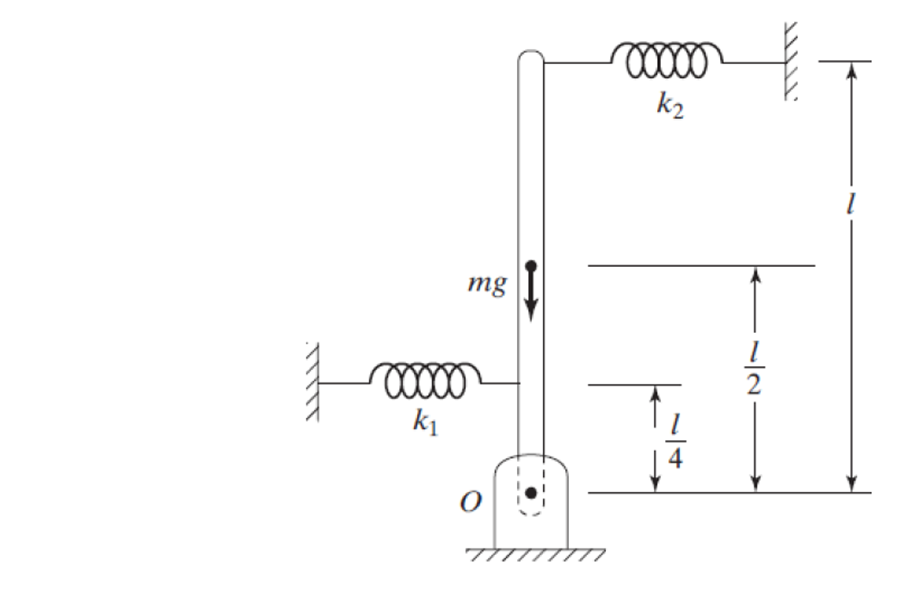

Utilice el mismo sistema del taller 8, pero incluya un torque disipativo producido por fricción viscosa $\tau=-c\dot{\theta}$. Encuentre la respuesta del ángulo de la barra en el tiempo una vez es liberada desde el reposo con una inclinación de 20° CW respecto a la posición mostrada en la figura.

Suponga los siguientes valores.

$$k_1=10 \frac{N}{m}$$
$$k_2=20 \frac{N}{m}$$
$$c=0.1 \frac{Nms}{rad}$$
$$m=1kg$$
$$l=1m$$


Ecuacion del sistema:

      2                                                
 2   d                                                 
L ⋅m⋅───(θ(t))                                         
       2               2                               
     dt            K₁⋅L ⋅θ(t)       2          d       
────────────── = - ────────── - K₂⋅L ⋅θ(t) - c⋅──(θ(t))
      3                16                      dt      

Solucion general con condiciones iniciales:

                                                                               ↪
θ(t) = -(0.00665763517995754⋅sin(7.864636037351⋅t) + 0.349065850398866⋅cos(7.8 ↪

↪                  -0.15⋅t
↪ 64636037351⋅t))⋅ℯ       


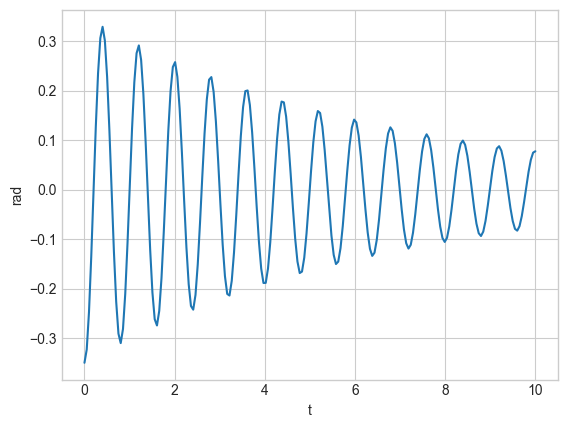

In [7]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

t = sp.Symbol('t')
θ = sp.Function('θ')(t)
m, g, L, K1, K2, c = sp.symbols('m g L K1 K2 c')

I = m*L**2/3

tk1 = -(K1*(L/4)**2)*θ
tk2 = -(K2*L**2)*θ
tc = -c*sp.diff(θ,t)   
eq = sp.Eq(I*sp.diff(θ,t,2), tk1+tk2+tc)
eq_s = sp.simplify(eq)

print("Ecuacion del sistema:\n")
sp.pprint(eq_s)

par = {m:1, g:9.81, L:1, K1:10, K2:20, c:0.1}
ode = sp.Eq(eq_s.lhs.subs(par), eq_s.rhs.subs(par))
θf = sp.dsolve(ode, ics={θ.subs(t,0): -20*sp.pi/180, sp.diff(θ,t).subs(t,0):0})

print("\nSolucion general con condiciones iniciales:\n")
sp.pprint(sp.simplify(θf))

fθ = sp.lambdify(t, θf.rhs, 'numpy')
tt = np.linspace(0,10,200)
plt.plot(tt, fθ(tt))
plt.xlabel("t")
plt.ylabel("rad")
plt.grid(True)
plt.show()